In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tweets = pd.read_csv('train.csv')
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
tweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


# Ubicacion de un tweet

La idea es analizar para ver si podemos encontrar alguna relacion entre la veracidad de los tweets y la ubicacion de los mismos. Primero revisamos como es el estilo de los datos y cuales son los mas frecuentes.

In [75]:
tweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


Armo un plot con el top 50 mas frecuentes ubicaciones para visualizar mejor la distribucion de ellas.

Text(0.5, 1.0, 'Frequencias de cada ubicacion')

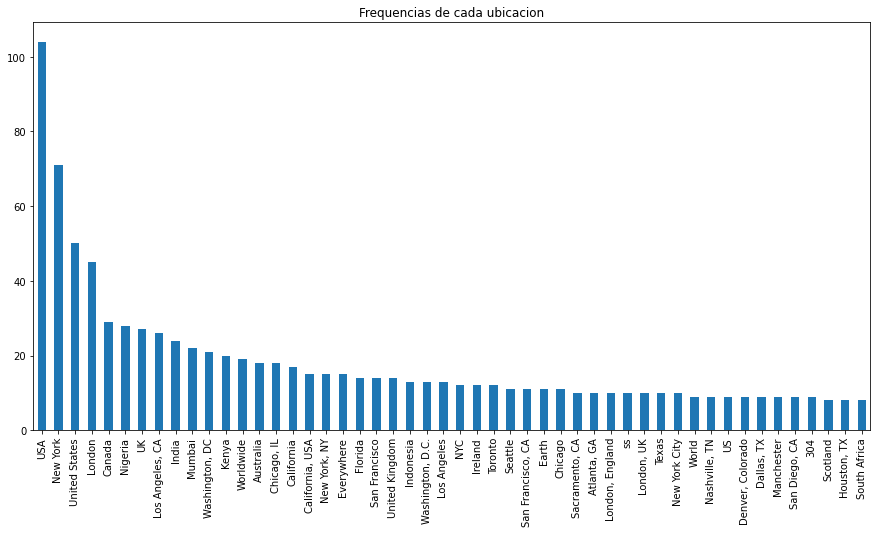

In [77]:
location_counts = tweets['location'].value_counts(dropna=True)
chart = location_counts.head(50).plot.bar(x='Ubicacion', y='Frequencia', figsize=(15,7.5))
chart.set_title('Frequencias de cada ubicacion')

¿Estara relacionada la veracidad de los tweets y la frecuencia de la ubicacion? Vamos a analizarlo agregando 2 columnas nuevas al dataframe. Estas nos van a mostrar la cantidad de tweets verdaderos y de tweets falsos que contiene cada lugar de ubicacion. 

In [78]:
location_df = pd.DataFrame([location_counts]).transpose()
location_df.columns = ['frequency']
location_df.loc[:, 'real_tweet_count'] = location_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].sum())
location_df.loc[:, 'fake_tweet_count'] = location_df.index.map(lambda x: tweets[(tweets['location'] == x)]['target'].apply(lambda y: 1 - y).sum())

Tomamos estas columnas nuevas y graficamos los datos para las 50 primeras.

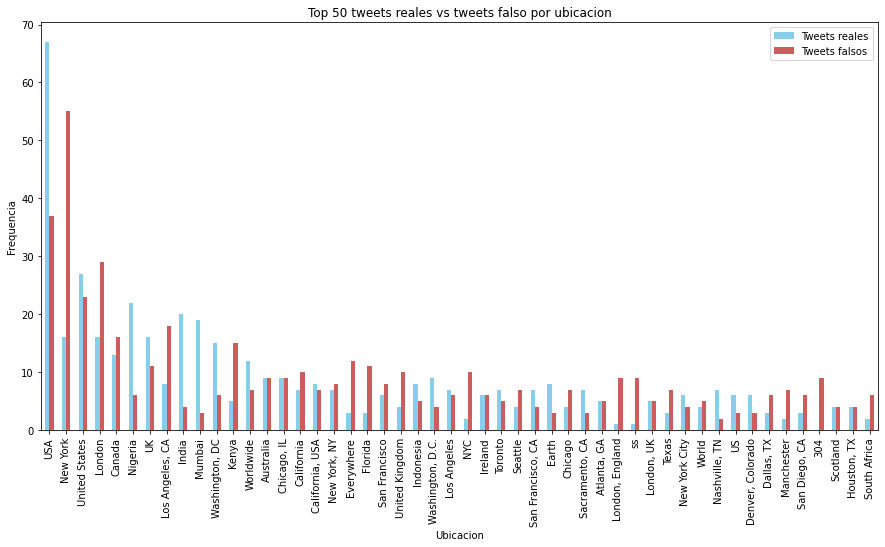

In [123]:
plot_df = pd.DataFrame({"Tweets reales": location_df['real_tweet_count'].head(50), "Tweets falsos": location_df['fake_tweet_count'].head(50)})
ax = plot_df.plot.bar(color=["SkyBlue","IndianRed"], figsize=(15,7.5), title="Top 50 tweets reales vs tweets falso por ubicacion")
ax.set_xlabel("Ubicacion")
ax.set_ylabel("Frequencia")
plt.show()

Como puede verse a primera vista no creo que podamos marcar ningun tipo de relacion entre las ubicaciones mas comunes y la veracidad de los tweets.

Ahora si, ¿Que ocurre con las ubicaciones que no representan ninguna ciudad? Voy a filtrar por ubicaciones que contengan caracteres invalidos como \#, ? y analizo la veracidad de esos tweets. 

In [121]:
invalid_characters_regex = '#|\$|\|%|\?|!|/|;|@|\+|\*'
tweets_with_invalid_locs = tweets[ tweets.location.notna() & tweets.location.str.match(invalid_characters_regex)]
tweets_with_invalid_locs

,id,keyword,location,text,target
306,448,armageddon,#FLIGHTCITY UK,((OFFICIAL VID)) #DoubleCups &gt;&gt; https://...,0
338,485,armageddon,#FLIGHTCITY UK,(OFFICIAL VID) &gt; #DoubleCups &gt;&gt; https...,0
344,493,armageddon,#FLIGHTCITY UK,**OFFICIAL VID** #TheReal &gt;&gt;&gt; https:/...,0
379,544,army,?,One Direction Is my pick for http://t.co/iMHFd...,0
476,686,attack,#UNITE THE BLUE,@blazerfan not everyone can see ignoranceshe i...,0
...,...,...,...,...,...
7244,10374,weapons,??? ?????????????,I will adamantly opposed to nuclear weapons.,1
7273,10412,whirlwind,#KaumElite;#F?VOR;#SMOFC,@byuwnbeki The sad eyes and tacit stories in y...,1
7351,10523,wildfire,?? Cloud Mafia ??,@_wildfire__ ???? Bruh that's the lady from Mu...,0
7460,10676,wounds,?Gangsta OC / MV RP; 18+.?,@IcyMagistrate ÛÓher upper armÛÒ those /frig...,1


La mayoria de los no nulos se encuentran en america del norte o ciudades relacionadas. Pero ¿Cuantos de estos son nulos?. Añado una columna nueva al dataframe para guardar informacion sobre si la ubicacion es nula o no.

In [33]:
loc_tweets = tweets[['location', 'text', 'target']].copy()
loc_tweets.loc[:, 'has_location'] = loc_tweets['location'].notna()
loc_tweets.head()

,location,text,target,has_location
0,NaN,Our Deeds are the Reason of this #earthquake M...,1,False
1,NaN,Forest fire near La Ronge Sask. Canada,1,False
2,NaN,All residents asked to 'shelter in place' are ...,1,False
3,NaN,"13,000 people receive #wildfires evacuation or...",1,False
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1,False


### Dividimos el analisis en 2 partes

#### Analisis de tweets sin ubicacion

Ahora si, ¿Cuantos tweets sin ubicacion tenemos?

#### Analisis de tweets con ubicacion

In [43]:
tweets_with_loc = loc_tweets[loc_tweets['has_location']]
len(tweets_with_loc)

5080

In [45]:
tweets_with_loc

,location,text,target,has_location
31,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,True
32,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,True
33,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,True
34,"Philadelphia, PA",Crying out for more! Set me ablaze,0,True
35,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,True
...,...,...,...,...
7575,TN,On the bright side I wrecked http://t.co/uEa0t...,0,True
7577,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0,True
7579,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,True
7580,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,True


¿Tendremos algun tipo de relacion entre la location y el texto?

In [56]:
in_text = tweets_with_loc.apply(lambda x: x['location'] in x['text'], axis=1)
tweets_with_loc.loc[:, 'location_in_text'] = in_text
tweets_with_loc.head()

,location,text,target,has_location,location_in_text
31,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,True,False
32,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,True,False
33,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,True,True
34,"Philadelphia, PA",Crying out for more! Set me ablaze,0,True,False
35,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,True,False
...,...,...,...,...,...
7575,TN,On the bright side I wrecked http://t.co/uEa0t...,0,True,False
7577,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0,True,False
7579,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,True,False
7580,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,True,False


In [63]:
tweets_with_loc[['target', 'location_in_text']].groupby('location_in_text')\
.agg({'target': [lambda x: sum([1 for y in x if y == 0]), lambda x: sum([1 for y in x if y == 1])]})

target           
                 <lambda_0> <lambda_1>
location_in_text                      
False                  2864       2156
True                     20         40